### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?



Ho: Latency has remained the same or descreased  
Ha: Latency has increased

Type 1 error: reject null hypothesis even though latency has not been affected  

Type 2 error: we reject null hypothesis because we think there is no affect, but latency has actually slowed

### Is the website redesign any good?



#### Has the traffic to the website gone up due to the redesign?

Ho: The website redesign has no affect on website traffic  
Ha: The website redesign has had an affect on website traffic  

Type 1 error: reject any affect on traffic     

Type 2 error: rejected traffic coming to website due to redesign when in actuality there is more engagement  

### Is our television ad driving more sales?


#### Is our television ad running in prime time television driving more sales?  

Ho: Sales are not affected with this ad running in prime time  
Ha: Sales are up due to this ad running in prime time  

Type 1 error: reject that sales stay consistent during ad run in prime time  

Type 2 error: reject change in sales but sales have risen  

### Central Limit Theorem

- A population (that is not necessarily normally distributed)
- Taking samples (of sufficient size) will result in normally distributed sample means


In [252]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

np.random.seed(123)

 

In [6]:
# define a roll [1,2,3,4,5,6]

# set sample size of 10


n_dice_per_experiment = ncols =10
n_experiments = nrows = 100

# 100 rows and 10 columns
data = np.random.randint(1,7, (nrows, ncols))

data[:4]

array([[6, 3, 5, 3, 2, 4, 3, 4, 2, 2],
       [1, 2, 2, 1, 1, 2, 4, 6, 5, 1],
       [1, 5, 2, 4, 3, 5, 3, 5, 1, 6],
       [1, 2, 4, 5, 5, 5, 2, 6, 4, 3]])

In [7]:
calculated_averages = data.mean(axis=1)
calculated_averages

array([3.4, 2.5, 3.5, 3.7, 3.2, 4.7, 3.4, 3.2, 3.4, 3. , 3.7, 3.5, 4. ,
       4.5, 2.9, 2.8, 2.9, 3.8, 3.2, 3.6, 3.4, 4. , 3.5, 3.3, 3.6, 3. ,
       4.3, 3. , 3.3, 3.2, 4.2, 3.9, 3.2, 3.8, 3.6, 3.4, 2.7, 3.4, 3.2,
       3.1, 3.2, 3. , 4.1, 3.3, 3. , 4.1, 3.4, 3.3, 2.9, 3.8, 3.4, 3.6,
       3.9, 3.2, 4.7, 3.8, 3.5, 2.8, 3.8, 4.7, 4.1, 3.5, 2.8, 3.7, 3.4,
       3.7, 3.6, 4.1, 3.6, 3.5, 2.9, 4. , 3.2, 3.4, 4.4, 2.9, 3.2, 3.9,
       1.9, 3. , 3. , 3.5, 3.3, 4.4, 3.4, 4.2, 4.1, 3.2, 3.5, 3.5, 3.8,
       3.1, 3.6, 2.9, 2.9, 4. , 3.3, 3.1, 3.4, 3.6])

Text(0.5, 1.0, 'Outcome of averaging 10 dice rolls 100 times')

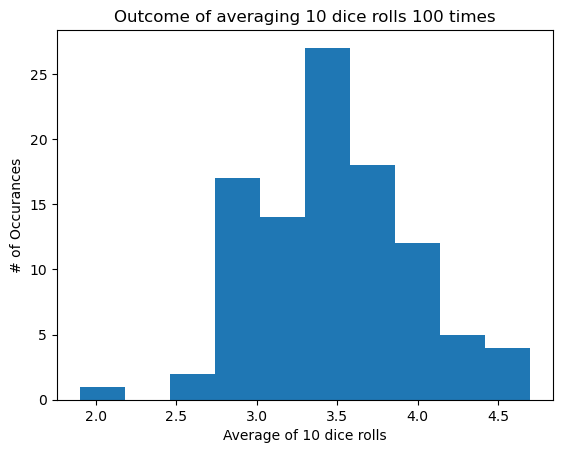

In [8]:
plt.hist(calculated_averages)
plt.xlabel(f'Average of {n_dice_per_experiment} dice rolls')
plt.ylabel('# of Occurances')
plt.title(f'Outcome of averaging {n_dice_per_experiment} dice rolls {n_experiments} times')


In [ ]:
# one sample T-test

1. plot distributions
2. establish hypothesis

# assumptions

-Variance

In [19]:
import env

db_url = f'mysql+pymysql://{env.username}:{env.password}@{env.host}/telco_churn'
df = pd.read_sql('SELECT * FROM customers', db_url)  



In [20]:
df.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service_type_id',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type_id',
       'paperless_billing', 'payment_type_id', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

<AxesSubplot:>

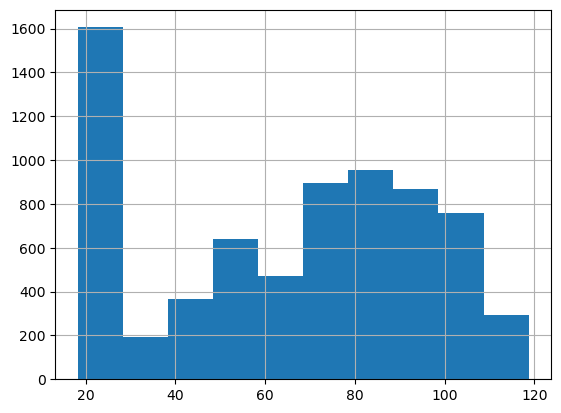

In [21]:
df.monthly_charges.hist()


<AxesSubplot:>

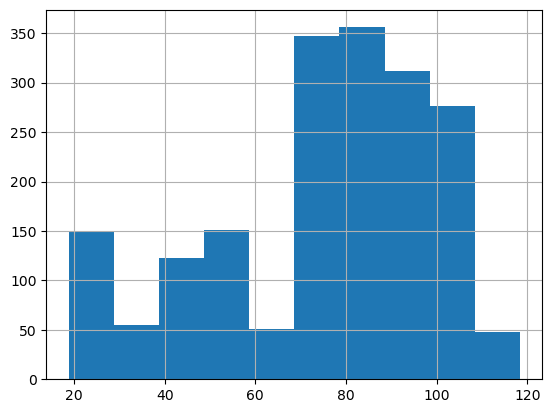

In [22]:
# filter for a sample who churn

churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()


In [24]:
## set hypothese
H_0: mean of monthly charges of churned customers <= mean of monthly charges of all customers

H_a: mean of monthly charges of churned customers > mean of monthly charges of all customers

In [28]:
## set alpha value

alpha = .05

In [29]:
df.churn.value_counts()



No     5174
Yes    1869
Name: churn, dtype: int64

In [30]:
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)


16.96540308050567 1.8703196496911995e-60 0.05


In [ ]:
# look at the t-statistic
# is t > 0
# look at the p/2
# is p/2 < alpha



In [34]:
if p/2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")


We reject $H_{0}$


In [35]:
# compare the calculated p-value to alpha

p < alpha

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothese')
    
    

We reject the null hypothesis


<AxesSubplot:>

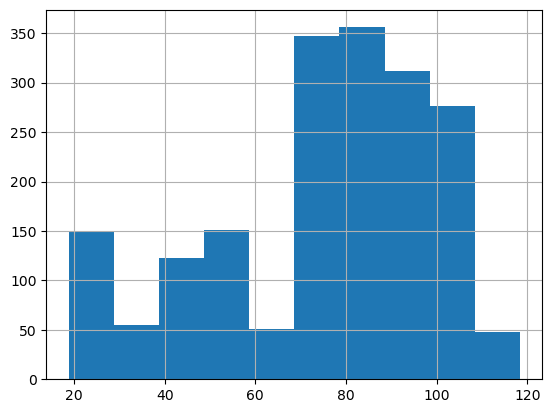

In [37]:
# independent t-test (a.k.a Two Sample t-test)   

# Goal: Compare the mean of some Group A to that of Group B

# Group A: Customer who churn

# customer who churn
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()



<AxesSubplot:>

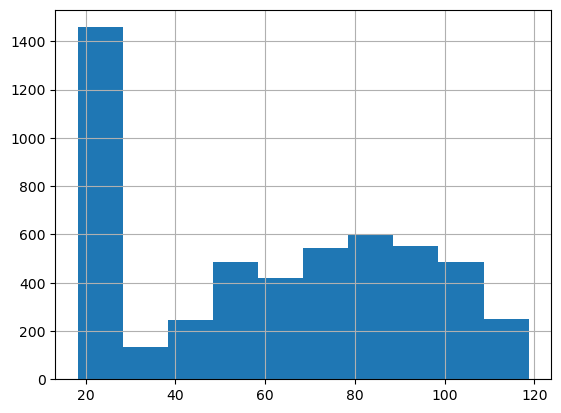

In [38]:
no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

## CUSTOMER WHO CHURN ARE CHARGED MORE THAN CUSTOMERS WHO DO NOT CHURN

### set hypothesis

H_0: Group who churn <= Group who do not churn  
H_a: Monthly charges of group who churn  > Monthly charges of group who do not churn

In [52]:
df = sns.load_dataset('iris')
df.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [49]:
df.sepal_length.describe()


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [50]:
versicolor_sepal_length = df[df.species == 'versicolor'].sepal_length
virginica_sepal_length = df[df.species == 'virginica'].sepal_length
setosa_sepal_length = df[df.species == 'setosa'].sepal_length


<AxesSubplot:>

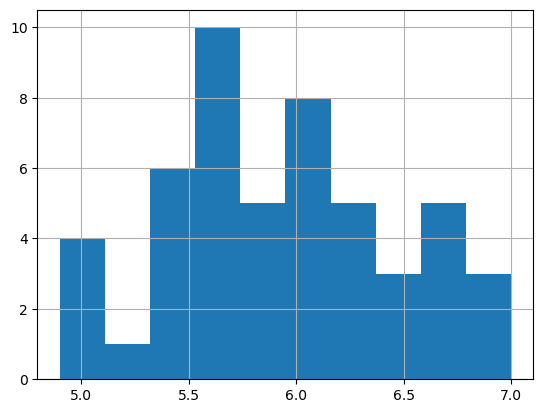

In [58]:
versicolor_sepal_length.hist()



<AxesSubplot:>

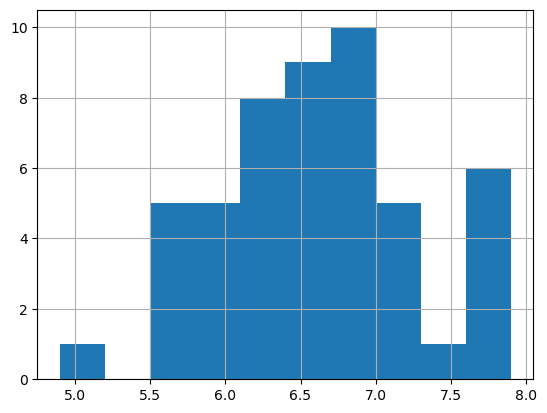

In [55]:
virginica_sepal_length.hist()


<AxesSubplot:>

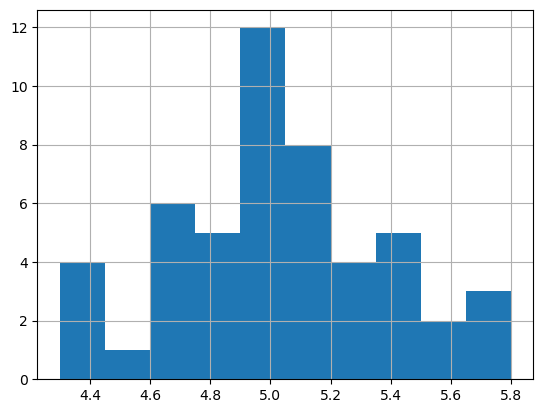

In [56]:
setosa_sepal_length.hist()


<AxesSubplot:>

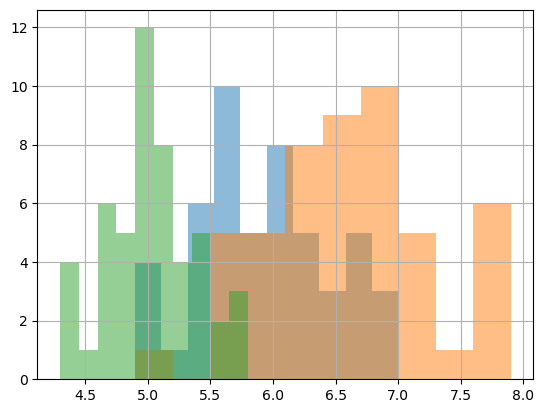

In [62]:
versicolor_sepal_length.hist(alpha=.5)
virginica_sepal_length.hist(alpha=.5)
setosa_sepal_length.hist(alpha=.5)

In [151]:
mpg1 = sns.load_dataset('mpg')
mpg1.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [152]:
#nulls anywhere?
mpg1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [153]:
# drop nulls
mpg1 = mpg1[~mpg1.horsepower.isna()]
mpg1.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [154]:
mpg1.origin.value_counts()

usa       245
japan      79
europe     68
Name: origin, dtype: int64

#### is horsepower of vehicles different across the distinct origins of the vehicles?

$H_{0}$: mean_horsepower_USA = mean_horsepower_JPN = mean_horsepower_EUR  
$H_{a}$: mean horsepowers from at least 2 countries are significantlly different

Assumptions  
1. At least 30 observations: met (see value counts above)  
2. Equal population variance across all 3 groups  
3. Groups are independent of each other  

<AxesSubplot:>

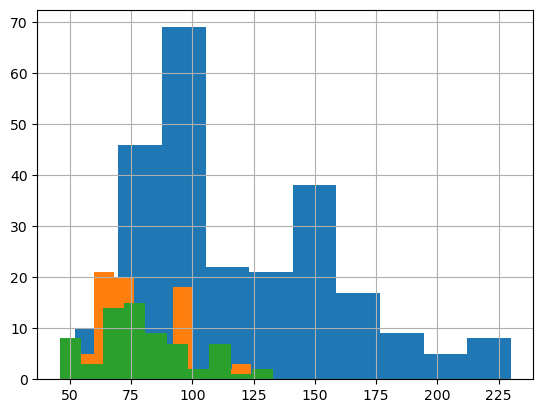

In [155]:
# lets look at the values of each of these and the histograms

mpg1[mpg1.origin=='usa'].horsepower.hist()
mpg1[mpg1.origin=='japan'].horsepower.hist()
mpg1[mpg1.origin=='europe'].horsepower.hist()

In [156]:
# creating a series of horsepower for each country
usa = mpg1[mpg1.origin == 'usa'].horsepower
japan = mpg1[mpg1.origin == 'japan'].horsepower
europe = mpg1[mpg1.origin == 'europe'].horsepower

In [157]:
# validate the variance assumption

stats.levene(usa, japan, europe)

LeveneResult(statistic=26.526632103545772, pvalue=1.5863075873913356e-11)

With low p-value, we can assume the variances of the countries horsepower is significantly different
across at least 2 of the countries
With this information, we should not use the ANOVA test, but should instead use Kruskal-Wallis

In [81]:
test_statistic, p_value = stats.kruskal(usa,japan,europe)

In [82]:
p_value

1.1759521262123952e-23

With p-value < 0.05 (alpha) we can say there exists a significant difference between the horsepower of vehicles in 
at 2 of the countries. But which 2?

Compare 2 groups, usa and japan

H_0: hp_usa == hp_japan  
H_a: hp_usa != hp_japan

In [85]:
t, p = stats.ttest_ind(usa,japan, equal_var=False)

if p < 0.05:
    print('There is a significant difference between the horsepower of vehicles in the USA vs JAPAN')
else:
    print('We failed to find a significant difference')

There is a significant difference between the horsepower of vehicles in the USA vs JAPAN


In [89]:
t, p = stats.ttest_ind(usa,europe, equal_var=False)

if p < 0.05:
    print(f'There is a significant difference between the horsepower of vehicles in the USA vs EUROPE. (p-value: {p})')
else:
    print('We failed to find a significant difference')

There is a significant difference between the horsepower of vehicles in the USA vs EUROPE. (p-value: 2.1065705369888018e-22)


In [94]:
t, p = stats.ttest_ind(europe,japan, equal_var=False)

if p < 0.05:
    print('There is a significant difference between the horsepower of vehicles in the EUROPE vs JAPAN')
else:
    print(f'We failed to find a significant difference (p-value: {p})')

We failed to find a significant difference (p-value: 0.8193616065509621)


### Answer with the type of test you would use (assume normal distribution):

##### Is there a difference in grades of students on the second floor compared to grades of all students?  
  

   


one sample t test, 2 tail

##### Are adults who drink milk taller than adults who dont drink milk?

independent t test, 1 tail

##### Is the the price of gas higher in texas or in new mexico?  

independent t test, 1 tail

##### Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA test

Load the mpg dataset and use it to answer the following questions:  

Is there a difference in fuel-efficiency in cars from 2008 vs 1999?  
independent t-test

In [158]:
mpg = data('mpg')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [159]:

mpg['year'].value_counts()


1999    117
2008    117
Name: year, dtype: int64

In [160]:
mpg['average_mileage'] = (mpg.cty + mpg.hwy) / 2
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0


In [261]:
mpg.groupby('year')['average_mileage'].mean()


year
1999    20.222222
2008    20.076923
Name: average_mileage, dtype: float64

Null: there is no difference in fuel eff between cars made in 2008 and 1999  
Alternative: there is a significant difference in fuel eff between cars made in 2008 and 1999

In [189]:
fuel_e_08 = mpg[mpg.year == 2008].average_mileage
fuel_e_99 = mpg[mpg.year == 1999].average_mileage


<AxesSubplot:>

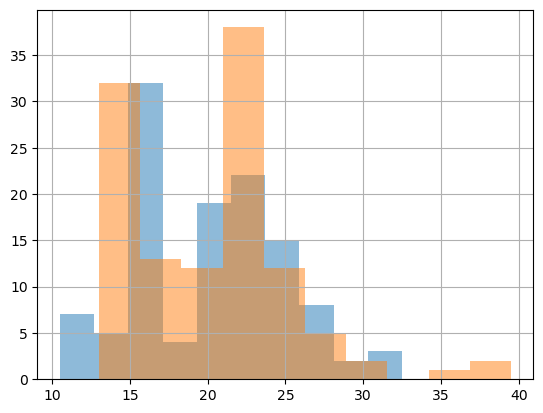

In [188]:
mpg[mpg.year == 2008].average_mileage.hist(alpha=.5)
mpg[mpg.year == 1999].average_mileage.hist(alpha=.5)

In [269]:
test_statistic, p_value = stats.kruskal(fuel_e_08, fuel_e_99)

In [270]:
p_value

0.7482541485808683

In [271]:
alpha = .05

t, p = stats.ttest_ind(fuel_e_08, fuel_e_99, equal_var=False)

if p < 0.05:
    print('Reject Null')
else:
    print(f'We failed to reject null (p-value: {p})')

We failed to reject null (p-value: 0.8263750772060638)


Takeaway: we failed to rejected the null hypothesis, and there is no significant difference bwtween fuel eff between cars made in 1999 and 2008

Are compact cars more fuel-efficient than the average car?  
1 sample t test  
1 tail

Null: compact cars are not more effienct than the average car  
Alternative: compact cars are more effienct than the average car

In [272]:
mpg.groupby('class')['average_mileage'].mean()

class
2seater       20.100000
compact       24.212766
midsize       23.024390
minivan       19.090909
pickup        14.939394
subcompact    24.257143
suv           15.814516
Name: average_mileage, dtype: float64

In [273]:
compact_eff = mpg[mpg['class'] == 'compact']['average_mileage']

In [274]:
compact_eff

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
6      22.0
7      22.5
8      22.0
9      20.5
10     24.0
11     23.0
12     20.0
13     21.0
14     21.0
15     20.0
142    25.0
143    23.0
170    22.5
171    23.5
172    22.0
173    23.5
187    24.0
188    25.0
189    26.0
190    26.5
191    22.0
192    22.0
193    22.5
194    27.0
195    28.5
196    30.5
197    32.5
198    30.5
208    25.0
209    22.5
210    25.0
211    25.5
212    20.5
213    38.5
214    25.0
215    22.5
216    25.5
217    25.0
218    25.0
219    25.0
220    19.5
221    20.5
Name: average_mileage, dtype: float64

In [276]:
mean_eff = mpg['average_mileage'].mean()
mean_eff

20.14957264957265

In [277]:
t3, p3 = stats.ttest_1samp(compact_eff, mean_eff)
t3, p3

(7.896888573132533, 4.198563794317163e-10)

In [279]:
alpha = .05

if t3 > 0 and p3 <= alpha/2:
    print('Reject Null')
else:
    print('We failed to reject null')

Reject Null


Takeaway: reject the null hypothesis; compact cars are more effienct than the average car

Do manual cars get better gas mileage than automatic cars?  

Null: manual cars are not more effcient than automatics  
Alternative: manual cars are more effcient than automatics

In [212]:
mpg['is_automatic'] = mpg.trans.str.startswith('a')

mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,average_mileage,is_automatic
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5,True
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0,False
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5,False
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5,True
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.5,True
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,25.0,False
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,21.0,True
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,22.0,False


In [280]:
manual_eff = mpg[mpg['trans'].str.startswith('m')]['average_mileage']
auto_eff = mpg[mpg['trans'].str.startswith('a')]['average_mileage']

In [281]:
manual_eff.var(), auto_eff.var()

(26.635167464114826, 21.942777233382337)

In [282]:
t4, p4 = stats.ttest_ind(manual_eff, auto_eff, equal_var=False)
t4, p4

(4.443514012903072, 1.7952248999917893e-05)

In [283]:
alpha = .05

if t4 > 0 and p4 < alpha:
    print('Reject Null')
else:
    print('We failed to reject null')

Reject Null


Takeaway: manual cars are significantly more efficient than automatic cars

In [226]:
mpg.groupby('is_automatic')['average_mileage'].mean()

is_automatic
False    22.227273
True     19.130573
Name: average_mileage, dtype: float64

In [227]:
gas_mileage = mpg.groupby('is_automatic')['average_mileage']

is_automatic
False    AxesSubplot(0.125,0.11;0.775x0.77)
True     AxesSubplot(0.125,0.11;0.775x0.77)
Name: average_mileage, dtype: object

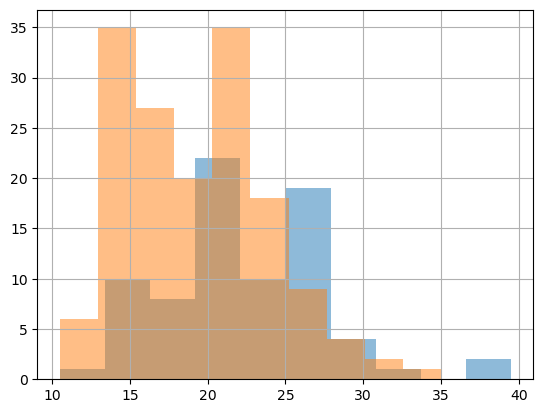

In [228]:
gas_mileage.hist(alpha =.5)

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [253]:
office_one = stats.norm(90, 15)
office_two = stats.norm(100, 20)

In [254]:
office_one

In [255]:
# get some random values (40 sales) for office one sample

office_one.rvs(40)

array([ 73.71554095, 104.9601817 ,  94.24467747,  67.40557929,
        81.32099622, 114.77154806,  53.59981135,  83.56631057,
       108.98904388,  76.99889397,  79.81670773,  88.57936547,
       112.37084439,  80.41647005,  83.34027061,  83.48473087,
       123.08895124, 122.80179133, 105.06080847,  95.79279599,
       101.06052864, 112.36098042,  75.96249197, 107.63743567,
        71.19178998,  80.43372746, 103.60657794,  68.5697895 ,
        87.8989692 ,  77.07367656,  86.16570944,  48.02116342,
        63.42700343,  79.50184148, 103.91193648,  87.39546476,
        90.04268874, 100.32334067,  76.80695485,  94.25440986])

In [256]:
dist_one = office_one.rvs(40)
dist_two = office_two.rvs(50)

In [257]:
dist_one.var(), dist_two.var()

(282.2599600468413, 465.82840550772147)

In [258]:
stats.levene(dist_one, dist_two)

LeveneResult(statistic=2.0403684615910986, pvalue=0.15671226486123732)

In [259]:
t, p = stats.ttest_ind(dist_one, dist_two, equal_var=False)
t,p

(-2.339391650498879, 0.0215804214141492)

Null: there's no difference between the two distributions  
Alternative: there's a significant difference between the two distributions

In [260]:
alpha = 0.05

if p <= alpha:
    print('Reject null')
else:
    print('Fail to reject null')

Reject null


Takeaway: we rejected the null hypothesis, and there is a significant difference between the two offices

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt

from scipy import stats
from pydataset import data

url = "https://gist.githubusercontent.com/ryanorsinger/2c13a71421037af127e9fa7fa1463cad/raw/3eb443414078b51af33fdb2d211159e5f3e220ab/exam_scores.csv"
df = pd.read_csv(url)

df.head(3)


,exam_score,hours_studied,study_strategy,handedness,coffee_consumed,hours_slept
0,100.591011,9.126291,flashcards,left,0,11
1,95.637086,9.677438,flashcards,left,1,10
2,53.200296,4.550207,NaN,right,5,6


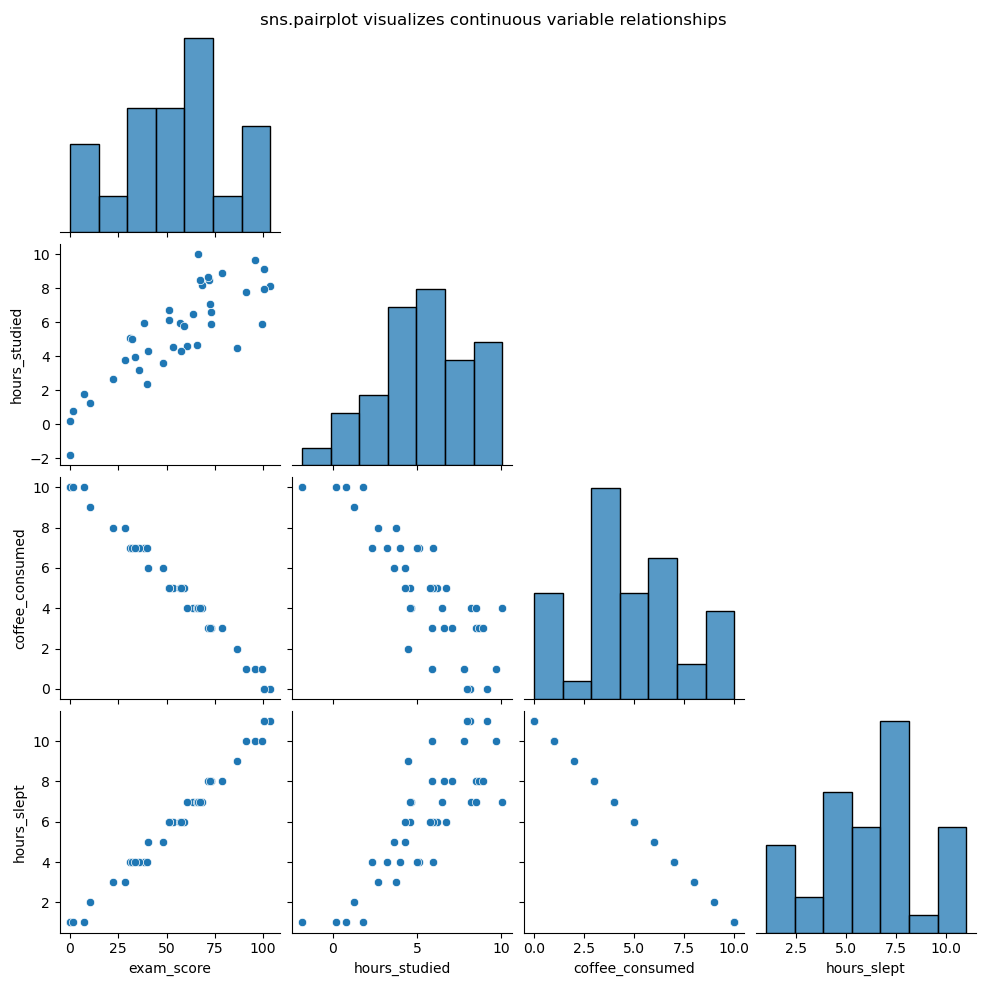

In [285]:
sns.pairplot(df, corner=True)
plt.suptitle("sns.pairplot visualizes continuous variable relationships")
plt.show()


In [286]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval
